# Investigating Netflix Movies
## Part 1
**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!


In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('./netflix_data.csv', header=0)

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


### The data
netflix_data.csv  
`show_id`: The ID of the show  
`type`: Type of show  
`title`: Title of the show  
`director`: Director of the show  
`cast`: Cast of the show  
`country`: Country of origin  
`date_added`: Date added to Netflix  
`release_year`: Year of Netflix release  
`duration`: Duration of the show in minutes  
`description`: Description of the show  
`genre`: Show genre

Perform exploratory data analysis on the `netflix_data.csv` data to understand more about movies from the 1990s decade.

* What was the most frequent movie duration in the 1990s?
  - 94

In [5]:
df['genre'].unique()

array(['International TV', 'Dramas', 'Horror Movies', 'Action',
       'Crime TV', 'Documentaries', 'Independent Movies', 'Comedies',
       'Sports Movies', 'Anime Series', 'Reality TV', 'TV Comedies',
       'Docuseries', 'Uncategorized', 'British TV',
       'International Movies', 'Sci-Fi', 'Kids', 'Children', 'TV Shows',
       'Classic Movies', 'Thrillers', 'Stand-Up', 'Anime Features',
       'Music', 'TV Dramas', 'TV Horror', 'TV Action', 'Classic',
       'Romantic TV', 'Cult Movies', 'TV Sci', 'Romantic Movies',
       'Spanish-Language', 'LGBTQ Movies'], dtype=object)

In [6]:
movie_genres = df[~df['genre'].str.contains('TV')]['genre'].unique()
movie_genres

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Anime Series',
       'Docuseries', 'Uncategorized', 'International Movies', 'Sci-Fi',
       'Kids', 'Children', 'Classic Movies', 'Thrillers', 'Stand-Up',
       'Anime Features', 'Music', 'Classic', 'Cult Movies',
       'Romantic Movies', 'Spanish-Language', 'LGBTQ Movies'],
      dtype=object)

In [7]:
movies_90s = df[
    (df['release_year'].between(1990, 1999)) &
    (df['genre'].isin(movie_genres)) &
    (df['duration'] > 2)
]
most_frequent_movie_duration_90s = movies_90s['duration'].value_counts(normalize=True)
most_frequent_movie_duration_90s.head()

duration
94     0.040201
101    0.030151
95     0.025126
93     0.025126
96     0.025126
Name: proportion, dtype: float64

* A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as `short_movie_count`.

In [8]:
short_action_movies_90s = df[(df['release_year'].between(1990, 1999)) & (df['genre'] == 'Action')]
short_action_movies_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
507,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994,160,Broke and with no concrete plans for the futur...,Action
627,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,95,When diabolical genius Dr. Evil travels back i...,Action
687,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,"October 1, 2019",1995,119,"In this fast-paced actioner, two Miami narcoti...",Action
756,s757,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",India,"April 1, 2018",1995,166,A naïve young man and a rich city girl fall in...,Action
1002,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...",Germany,"January 1, 2021",1999,94,A jewel thief returns to his hiding place afte...,Action


In [9]:
short_action_movies_90s['duration'].value_counts().sort_index().head()

duration
69    1
82    1
83    1
84    1
87    1
Name: count, dtype: int64

In [10]:
short_movie_count = len(short_action_movies_90s)
short_movie_count

50

## Part 2
Objective:
* To determine whether the average duration of movies on Netflix has been declining over the years.


In this part, you will investigate the trend in the duration of movies available on Netflix. By analyzing historical data, you will determine if there is a noticeable decline in the average length of movies. This analysis will involve data cleaning, exploration, visualization, and statistical testing.

Include suitable visualizations, such as charts or graphs, to investigate the trend.

There are a few questions about this trend that we are worth to answer, for instance:
* What does this trend look like over a longer period of time?
* Is this explainable by something like the genre of entertainment?

Your goal for this project is to present your findings using appropriate visualizations and statistical evidence to support their conclusions.


In [11]:
len(df)

7787

In [12]:
# cleaning data
# check for missing values
missing_values = df.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [13]:
# remove rows with missing values
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()

In [14]:
# remove duplicate rows
data_types = df_cleaned.dtypes
data_types

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [15]:
len(df_cleaned)

4812

In [16]:
df_cleaned.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [17]:
df_cleaned.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

In [18]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

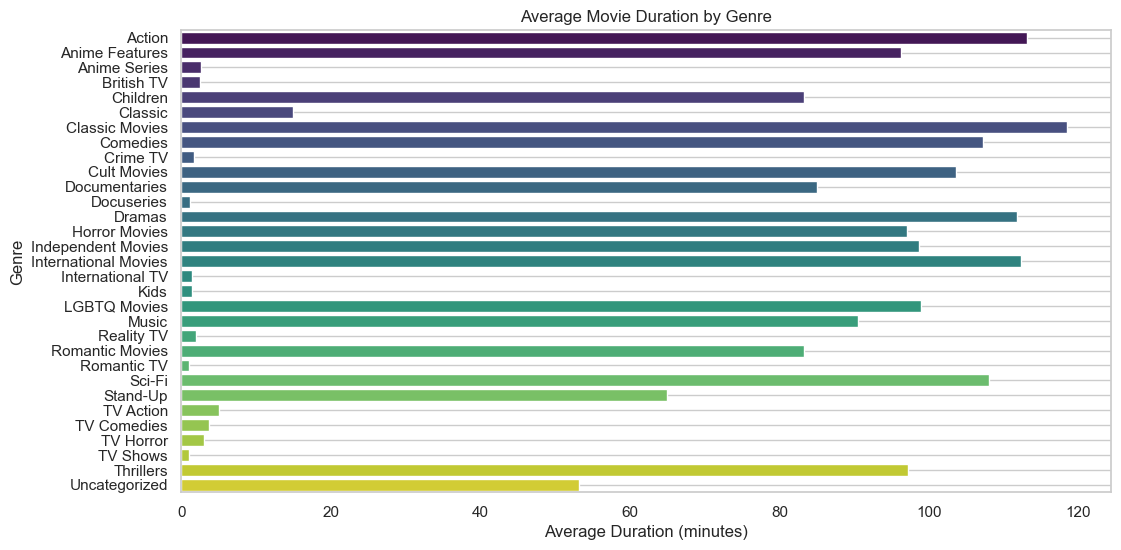

In [19]:
average_duration_per_genre = df_cleaned.groupby('genre')['duration'].mean().reset_index()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=average_duration_per_genre, x='duration', y='genre', hue='genre', palette='viridis', legend=False)
plt.title('Average Movie Duration by Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.grid()

plt.show()

In [20]:
movie_genres = average_duration_per_genre[average_duration_per_genre['duration'] > 60]['genre'].to_numpy()
movie_genres

array(['Action', 'Anime Features', 'Children', 'Classic Movies',
       'Comedies', 'Cult Movies', 'Documentaries', 'Dramas',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'LGBTQ Movies', 'Music', 'Romantic Movies', 'Sci-Fi', 'Stand-Up',
       'Thrillers'], dtype=object)

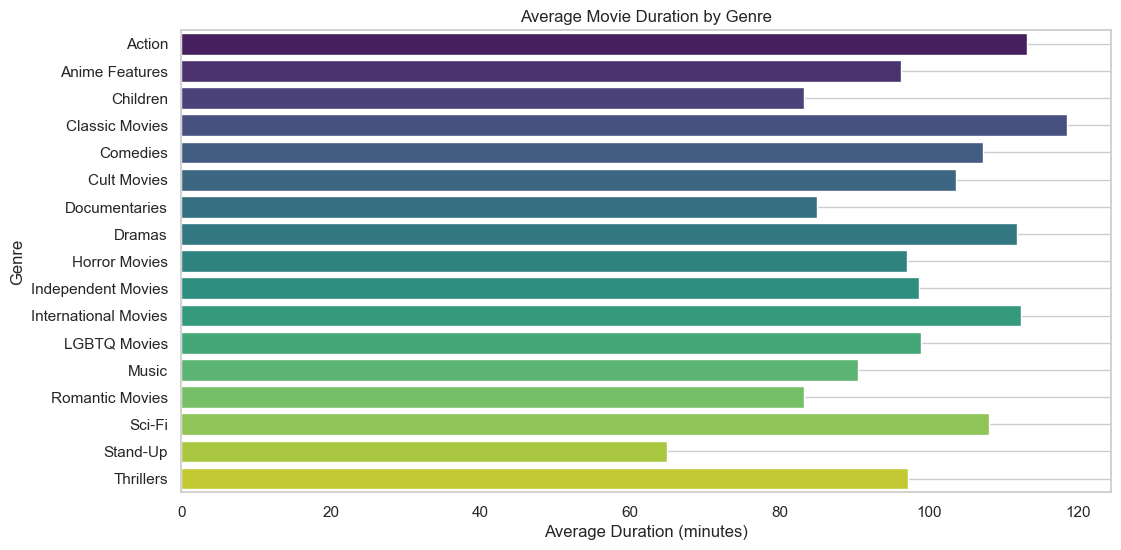

In [21]:
df_movies = df_cleaned[df_cleaned['genre'].isin(movie_genres)]
average_duration_per_genre = df_movies.groupby('genre')['duration'].mean().reset_index()

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.barplot(data=average_duration_per_genre, x='duration', y='genre', hue='genre', palette='viridis', legend=False)
plt.title('Average Movie Duration by Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.grid()
plt.show()

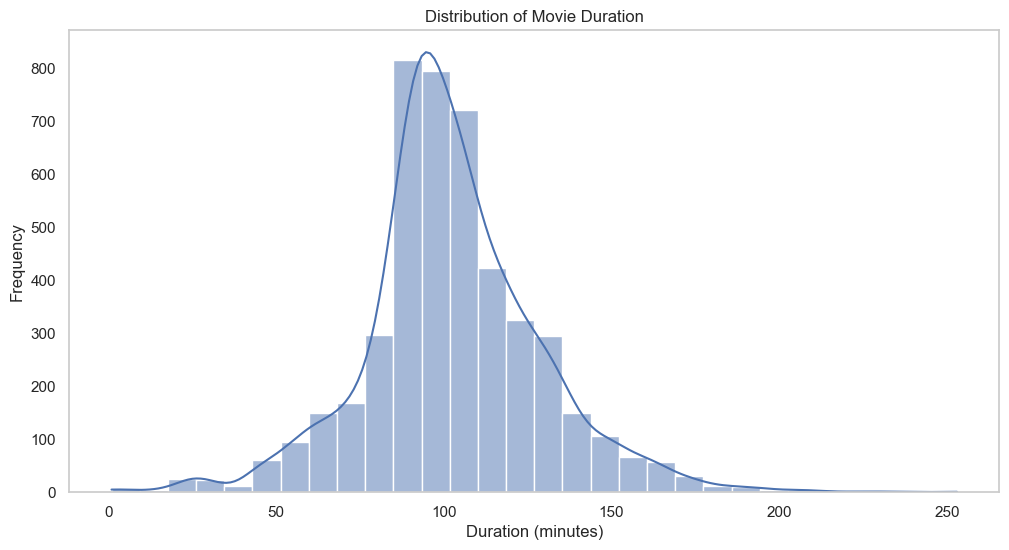

In [22]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a histogram for the duration
plt.figure(figsize=(12, 6))
sns.histplot(df_movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

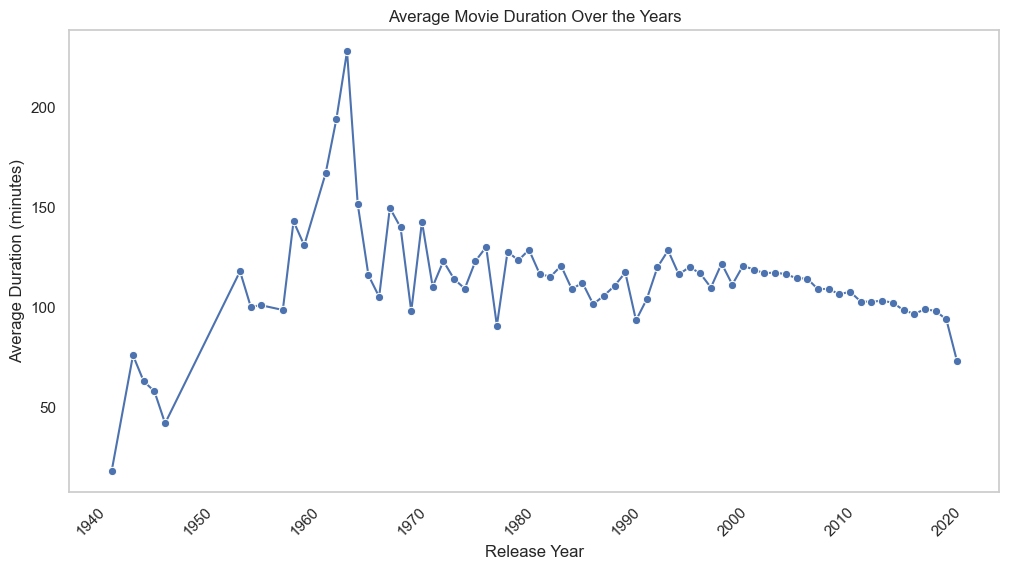

In [23]:
# Group by release year and calculate the average duration
average_duration_per_year = df_movies.groupby('release_year')['duration'].mean().reset_index()

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a line plot to visualize the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration_per_year, x='release_year', y='duration', marker='o')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

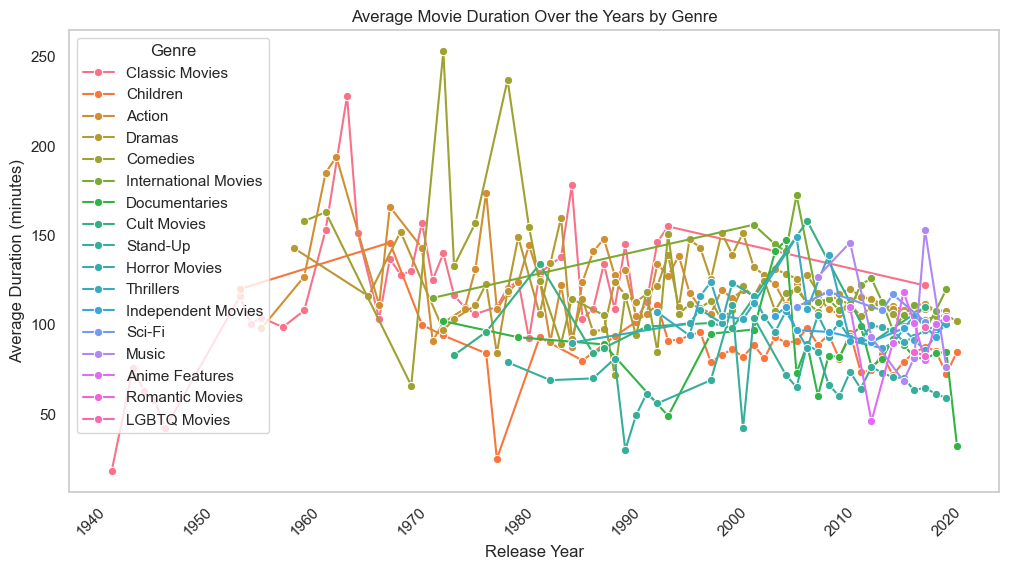

In [24]:
# Group by release year and genre, then calculate the average duration
average_duration_per_year_genre = df_movies.groupby(['release_year', 'genre'])['duration'].mean().reset_index()

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a line plot to visualize the trend by genre
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration_per_year_genre, x='release_year', y='duration', hue='genre', marker='o')
plt.title('Average Movie Duration Over the Years by Genre')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Genre')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_23020\3977242720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies.loc[:, 'decade'] = (df_movies['release_year'] // 10) * 10


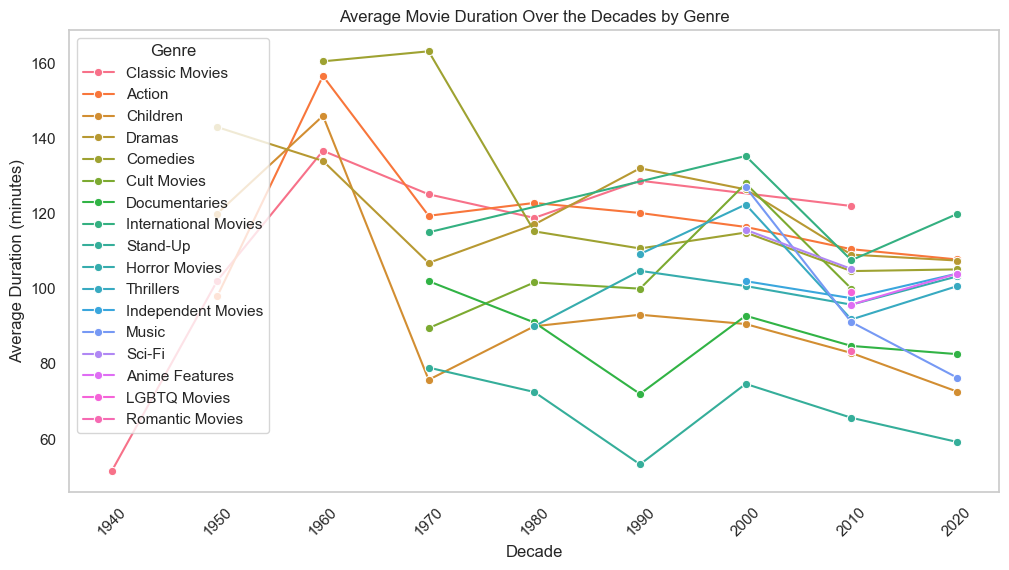

In [25]:
# Create a new column for the decade
df_movies.loc[:, 'decade'] = (df_movies['release_year'] // 10) * 10

# Group by decade and genre, then calculate the average duration
average_duration_per_decade_genre = df_movies.groupby(['decade', 'genre'])['duration'].mean().reset_index()

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a line plot to visualize the trend by genre
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration_per_decade_genre, x='decade', y='duration', hue='genre', marker='o')
plt.title('Average Movie Duration Over the Decades by Genre')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Genre')
plt.show()

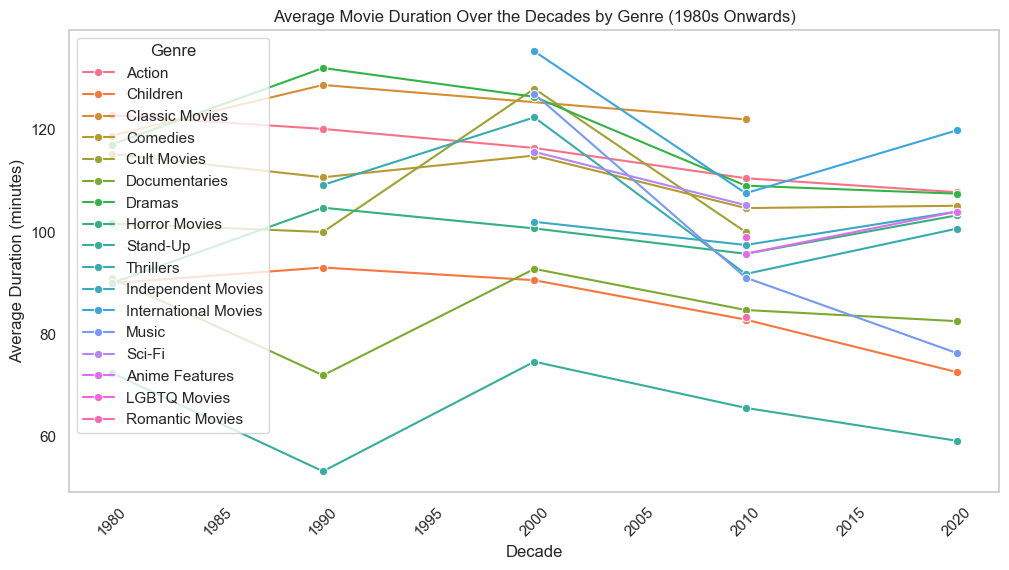

In [26]:
# Create a new column for the decade
df_movies.loc[:, 'decade'] = (df_movies['release_year'] // 10) * 10

# Filter for decades from the 1980s onwards
df_movies_filtered = df_movies[df_movies['decade'] >= 1980]

# Group by decade and genre, then calculate the average duration
average_duration_per_decade_genre = df_movies_filtered.groupby(['decade', 'genre'])['duration'].mean().reset_index()

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a line plot to visualize the trend by genre
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration_per_decade_genre, x='decade', y='duration', hue='genre', marker='o')
plt.title('Average Movie Duration Over the Decades by Genre (1980s Onwards)')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Genre')
plt.show()

In [27]:
# Filter data for the 2010s and 2020s
average_duration_per_decade = df_movies.groupby(['decade', 'genre'])['duration'].mean().reset_index()

# Get average duration for the 2010s and 2020s
average_duration_2010s = average_duration_per_decade[average_duration_per_decade['decade'] == 2010].rename(columns={'duration': 'average_duration_2010s'})
average_duration_2020s = average_duration_per_decade[average_duration_per_decade['decade'] == 2020].rename(columns={'duration': 'average_duration_2020s'})

# Merge the two DataFrames
merged_average_duration = pd.merge(average_duration_2010s[['genre', 'average_duration_2010s']],
                                    average_duration_2020s[['genre', 'average_duration_2020s']],
                                    on='genre', how='outer')

# Display the result
print(merged_average_duration)

                   genre  average_duration_2010s  average_duration_2020s
0                 Action              110.509259              107.777778
1         Anime Features               95.764706              104.000000
2               Children               82.887640               72.622951
3         Classic Movies              122.000000                     NaN
4               Comedies              104.682128              105.130435
5            Cult Movies              100.000000                     NaN
6          Documentaries               84.766234               82.583333
7                 Dramas              109.057226              107.494253
8          Horror Movies               95.750000              103.263158
9     Independent Movies               97.466667              104.000000
10  International Movies              107.576923              119.875000
11          LGBTQ Movies               99.000000                     NaN
12                 Music               91.100000   

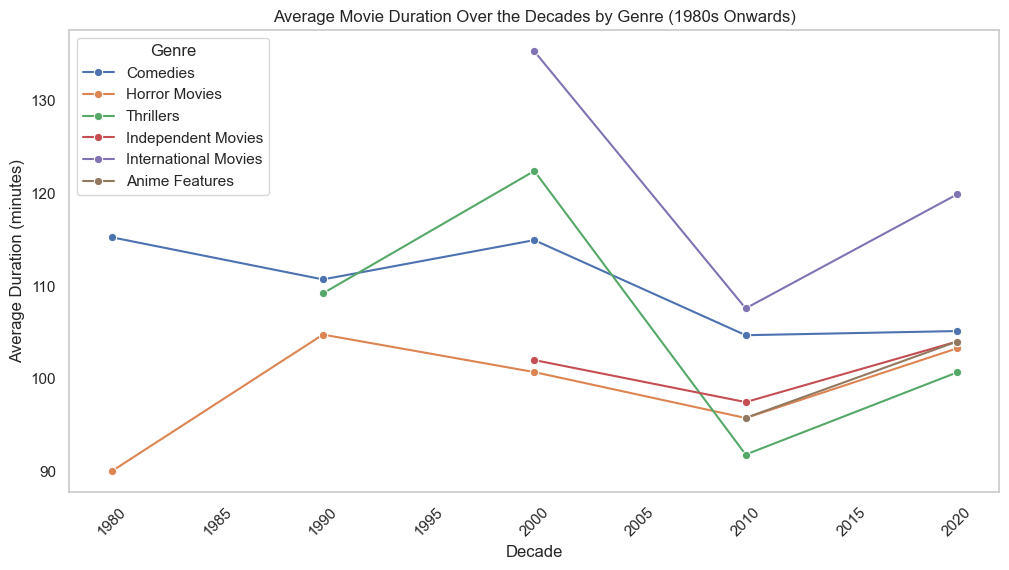

In [28]:
# Create a new column for the decade
df_movies.loc[:, 'decade'] = (df_movies['release_year'] // 10) * 10

df_movies_filtered = df_movies[
    (df_movies['decade'] >= 1980) &
    (df_movies['genre'].isin(['Anime Features', 'Comedies', 'Horror Movies', 'Independent Movies', 'International Movies', 'Thrillers']))
]

# Group by decade and genre, then calculate the average duration
average_duration_per_decade_genre = df_movies_filtered.groupby(['decade', 'genre'])['duration'].mean().reset_index()

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a line plot to visualize the trend by genre
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_duration_per_decade_genre, x='decade', y='duration', hue='genre', marker='o')
plt.title('Average Movie Duration Over the Decades by Genre (1980s Onwards)')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Genre')
plt.show()